# **Decision Tree**


# Task 1: Data Preparation

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease.csv


In [ ]:
#Reading The Dataset And Printing few Rows
import pandas as pd
heart_disease_data = pd.read_csv('heart_disease.csv')
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


# Task 2: Exploratory Data Analysis (EDA)

In [ ]:
# Handle missing values
from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
categorical_cols = heart_disease_data.select_dtypes(include=['object']).columns
numerical_cols = heart_disease_data.select_dtypes(exclude=['object']).columns

print("Categorical Columns:", categorical_cols)
print("\nNumerical Columns:", numerical_cols)


# Create an imputer object
imputer = SimpleImputer(strategy='mean')

# Fill missing values in numerical columns with mean
heart_disease_data[numerical_cols] = imputer.fit_transform(heart_disease_data[numerical_cols])

# Fill missing values in categorical columns with mode
imputer = SimpleImputer(strategy='most_frequent')
heart_disease_data[categorical_cols] = imputer.fit_transform(heart_disease_data[categorical_cols])

Categorical Columns: Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

Numerical Columns: Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num'], dtype='object')


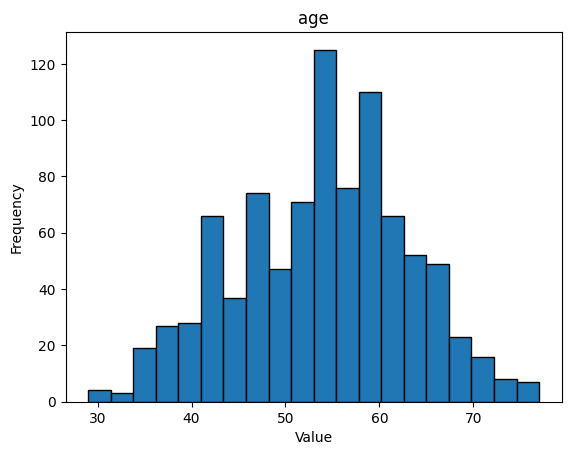

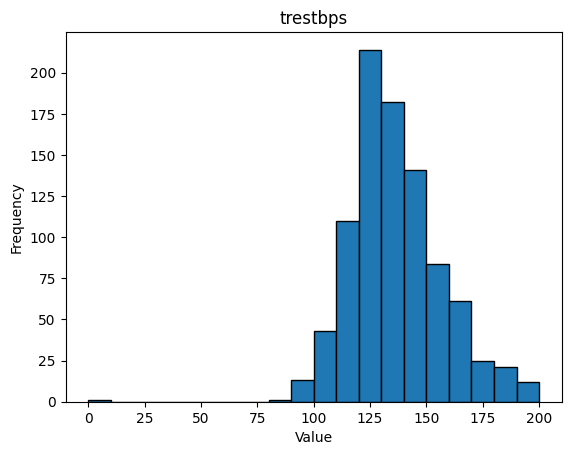

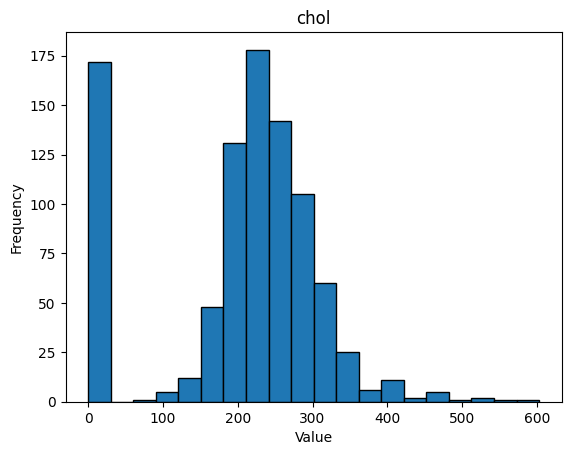

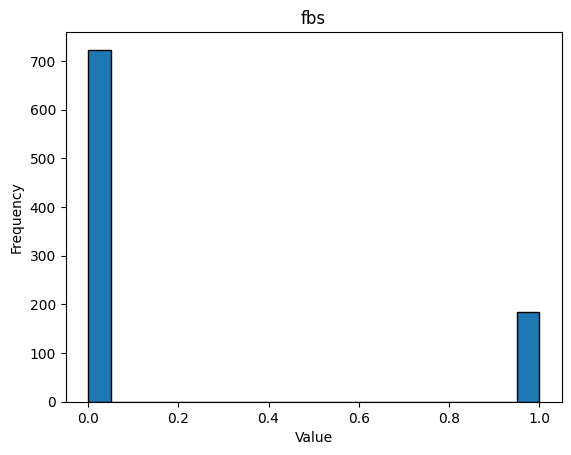

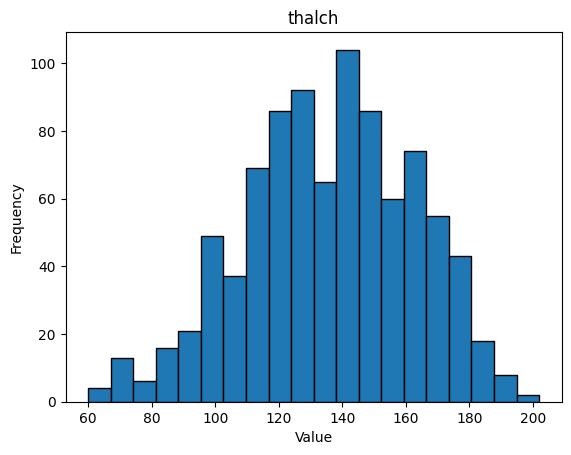

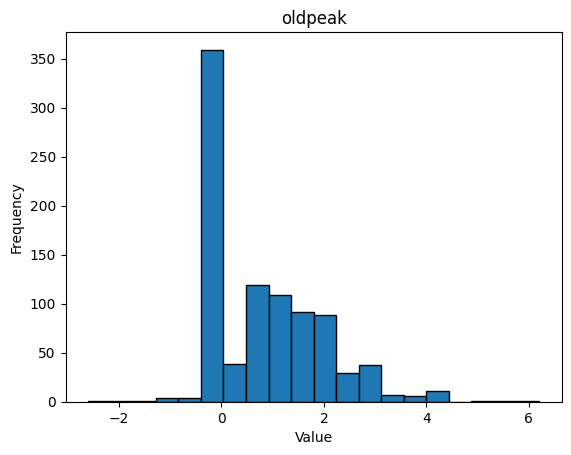

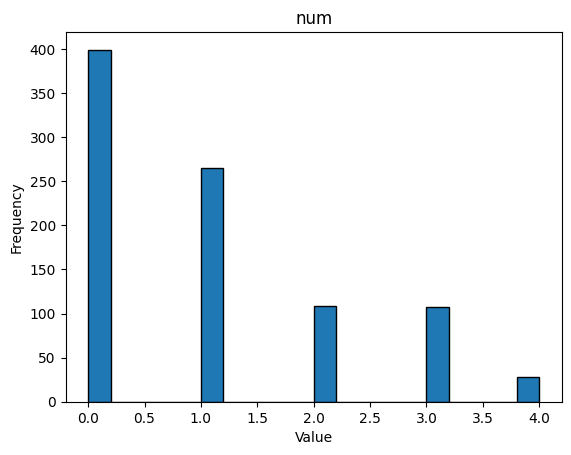

In [ ]:
# Visualize the distribution of numerical features
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
for col in numerical_cols:
    plt.hist(heart_disease_data[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

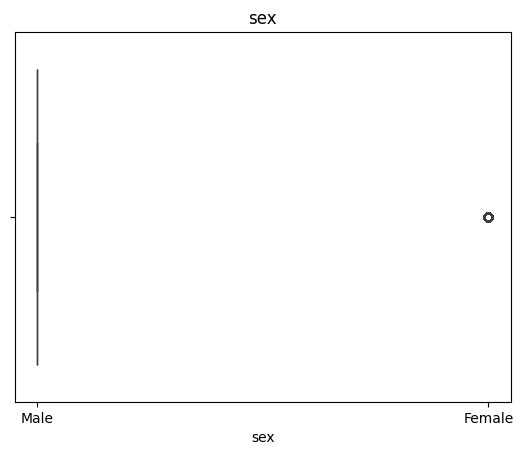

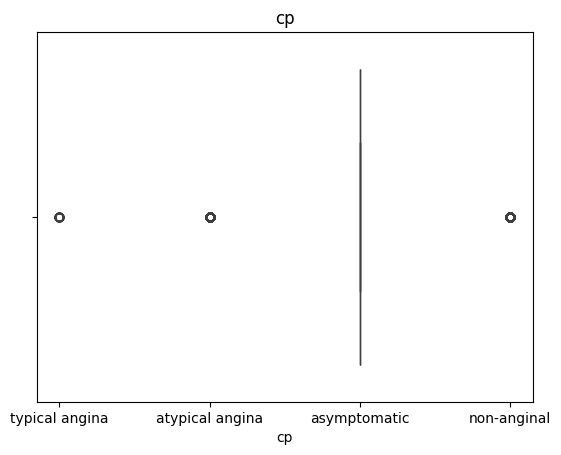

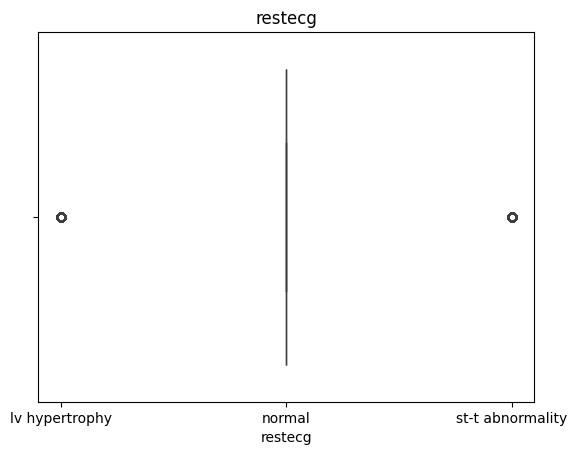

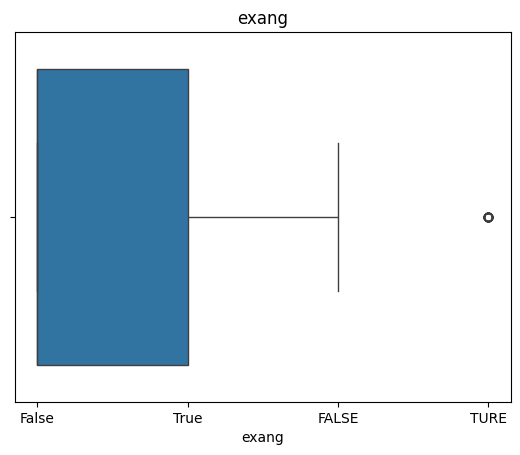

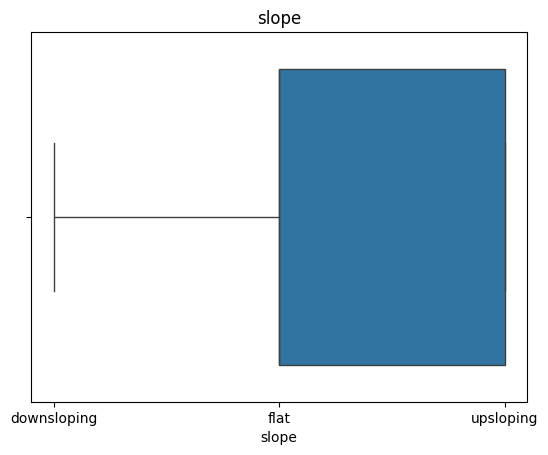

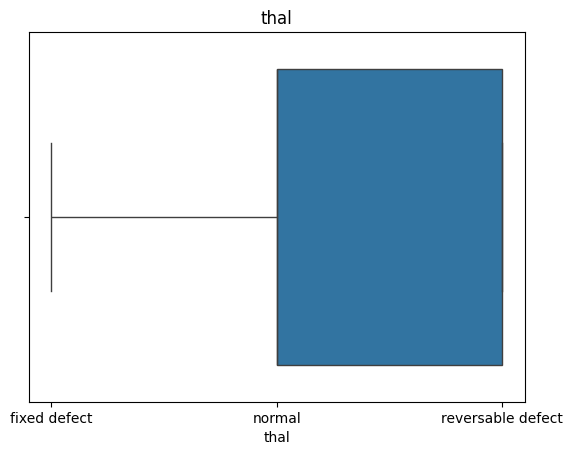

<Figure size 640x480 with 0 Axes>

In [ ]:
#Visualize the distribution of categorical features
import seaborn as sns

# Plot box plots for categorical columns
for col in categorical_cols:
    sns.boxplot(x=col, data=heart_disease_data)
    plt.title(col)
    plt.show()
    plt.tight_layout()

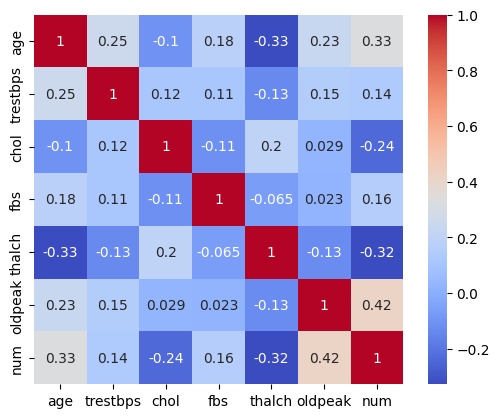

In [ ]:
# Visualize the correlation matrix for numerical columns
corr_matrix = heart_disease_data[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

# 3. Feature Engineering

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    heart_disease_data[col] = le.fit_transform(heart_disease_data[col])

# Scale numerical features
scaler = StandardScaler()
heart_disease_data[numerical_cols] = scaler.fit_transform(heart_disease_data[numerical_cols])

# 4. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert 'num' to discrete classes because we can apply decision tree classifier to continious target values ((or)) we can apply directly decision tree regressor.
heart_disease_data['num'] = pd.cut(heart_disease_data['num'], bins=[-float('inf'), 0, float('inf')], labels=[0, 1])

# Split the dataset into training and testing sets
X = heart_disease_data.drop('num', axis=1)
y = heart_disease_data['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7197802197802198

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       137
           1       0.43      0.44      0.44        45

    accuracy                           0.72       182
   macro avg       0.63      0.63      0.63       182
weighted avg       0.72      0.72      0.72       182


Confusion Matrix:
 [[111  26]
 [ 25  20]]


# 5. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter tuning space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Best Score: 0.7562588568729334


# Task 6: Model Evaluation and Analysis

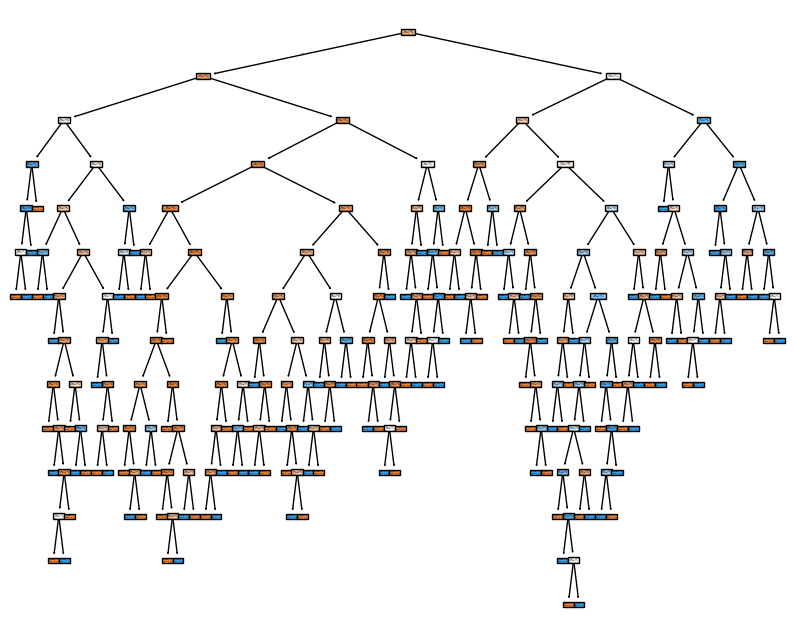

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree structure
plt.figure(figsize=(10, 8))
plot_tree(dt_model, filled=True)
plot_params = {'fontsize': 8}
plt.show()

# **Interview Questions**

**1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?**

**Main Hyperparameters:**
-------------------------

**Learning Rate:** Controls how quickly the model learns from data.

**Batch Size:** Number of samples used to update model parameters.

**Number of Epochs:** Number of times the model sees the training data.

**Regularization:** Prevents overfitting by adding a penalty term.

**Depth/Complexity:** Number of layers or complexity of the model.

**Key Hyperparameters:**
------------------------

**max_depth:** Maximum tree depth

**min_samples_split:** Minimum samples to split a node

**min_samples_leaf:** Minimum samples at a leaf node

**max_features:** Maximum features to

**criterion:** Splitting criterion (e.g., 'gini', 'entropy')


---



**2. What is the difference between the Label encoding and One-hot encoding?**

**Label Encoding vs One-hot Encoding:**

**Label Encoding:** Assigns a unique integer to each category

**One-hot Encoding:** Creates a new binary feature for each category

**Key Difference:**

Label encoding implies an order, while one-hot encoding does not.

* Both are used for converting catergorical columsn data into numerical.


---


